# Financial Planning for Emergencies and Retirement using APIs and Simulations

This application provides two financial analysis tools:

1: A financial planner for emergencies. Users can visualize their current savings and determine if they have enough reserves for an emergency fund.

2: A financial planner for retirement. Users can forecast the performance of their retirement portfolio in 30 years. The application will make a call to the n Alpaca API via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

Information from the Monte Carlo simulations will answer questions about the user's portfolio.


In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

In [16]:
# The current number of coins for each cryptocurrency asset held in the portfolio.

btc_coins = 1.2
eth_coins = 5.3

In [17]:
# Set the monthly amount for the member's household income

monthly_income = 12000


In [18]:
# Set the Free Crypto API Call endpoint URLs for the held cryptocurrency assets

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [19]:
# Make an API call to access the current price of BTC

btc_response = requests.get(btc_url).json()

# Display the response data
print(json.dumps(btc_response, indent=4, sort_keys=True))



{
    "data": {
        "1": {
            "circulating_supply": 19087012,
            "id": 1,
            "last_updated": 1657161826,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 389477018898,
                    "percent_change_1h": -0.409846053005022,
                    "percent_change_24h": 2.67306143962213,
                    "percent_change_7d": 1.48122125753001,
                    "percentage_change_1h": -0.409846053005022,
                    "percentage_change_24h": 2.67306143962213,
                    "percentage_change_7d": 1.48122125753001,
                    "price": 20406.0,
                    "volume_24h": 20699587556
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19087012,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [20]:
# Make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Display the response data
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 119582164,
            "id": 1027,
            "last_updated": 1657161844,
            "max_supply": 119581614,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 140345634913,
                    "percent_change_1h": -1.04286479206271,
                    "percent_change_24h": 4.77894937032938,
                    "percent_change_7d": 6.59391494097963,
                    "percentage_change_1h": -1.04286479206271,
                    "percentage_change_24h": 4.77894937032938,
                    "percentage_change_7d": 6.59391494097963,
                    "price": 1171.37,
                    "volume_24h": 13610640613
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119582164,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypto

In [21]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
btc_price


20406.0

In [22]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
eth_price


1171.37

In [23]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f"The value of your BTC is ${btc_value:,.2f}")


The value of your BTC is $24,487.20


In [24]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"The value of your ETH is ${eth_value:,.2f}")


The value of your ETH is $6,208.26


In [25]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The value of your crypto protfolio is ${total_crypto_wallet:,.2f}")


The value of your crypto protfolio is $30,695.46


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK


In [3]:
# Set the current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


In [4]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [5]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()


In [34]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()


SPY                                   \
                             open    high    low   close    volume   
timestamp                                                            
2020-08-07 04:00:00+00:00  333.29  334.88  332.3  334.57  57282821   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.395   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306

In [35]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
agg_close_price


119.43

In [36]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df["SPY"]["close"])

# Print the AGG closing price
spy_close_price


334.57

In [37]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
agg_value


23886.0

In [38]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
spy_value


36802.7

In [39]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


60688.7

In [40]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
total_portfolio


91384.161

### Evaluate the Emergency Fund


In [43]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]
    
# Review the Python list savings_data
savings_data
    

[30695.461, 60688.7]

In [45]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    {'Value':[total_crypto_wallet, total_stocks_bonds]},
    index=['Crypto', 'Stocks']
)


# Display the savings_df DataFrame
savings_df


,Value
Crypto,30695.461
Stocks,60688.700


<AxesSubplot:title={'center':'Portfolio Composition - 2020-08-07'}, ylabel='Value'>

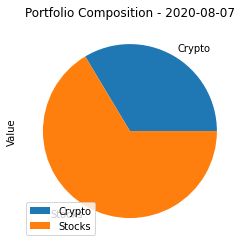

In [46]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='Value', title='Portfolio Composition - 2020-08-07')


In [65]:
# Create a variable named emergency_fund_value and set to 3x monthly_income
emergency_fund_value = 200000

emergency_fund_value


200000

In [67]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    display("Congratulations, you have enought to create your emergency fund!")
elif total_portfolio == emergency_fund_value:
    display("Congratulations, you have reached an important milestone to be able to create your emergency fund!")
else:
    display(f"Keep saving. You only need ${(emergency_fund_value - total_portfolio):,.2f} more to create your emergency fund!")

'Keep saving. You only need $108,615.84 more to create your emergency fund!'

## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [75]:
# Set start and end dates of 3 years back from your current date

start_date = pd.Timestamp("2017-08-08", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

In [77]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data

prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame to separate the ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame
display(prices_df.head())
display(prices_df.tail())


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   
2017-08-14 04:00:00+00:00  245.55  246.79  245.55  246.54   73291919   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2017-08-08 04:00:00+00:00      192921  247.739709  109.67  109.6900  109.50   
2017-08-09 04:00:00+00:00      223650  246.791421  109.87  109.8700  109.66   
2017-08-10 04:00:00+00:00      424321  245.027847  109.70  109.8500  109.67   
2017-08-11 04:00:00+00:00      278786  244.222867  109.75  109.9400  109.68   
2017-08-14 04:00:00+00:00      227671  246.332178  109.84  109.8969  109.74   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-08-08 04:00:00+00:00  109.57  2570876       12663  109.577636  
2017-08-09 04:00:00+00:00  109.67  2308932       11031  109.771749  
2017-08-10 04:00:00+00:00  109.78  2004163       12437  109.776611  
2017-08-11 04:00:00+00:00  109.87  1913253       10113  109.860974  
2017-08-14 04:00:00+00:00  109.82  2294261       10792  109.825015

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2020-08-03 04:00:00+00:00  328.31  329.62  327.73  328.79  53080454   
2020-08-04 04:00:00+00:00  327.88  330.06  327.86  330.06  41918004   
2020-08-05 04:00:00+00:00  331.46  332.39  331.18  332.11  42870955   
2020-08-06 04:00:00+00:00  331.52  334.46  331.13  334.33  43745653   
2020-08-07 04:00:00+00:00  333.29  334.88  332.30  334.57  57282821   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2020-08-03 04:00:00+00:00      288008  328.658804  119.37  119.40  119.1903   
2020-08-04 04:00:00+00:00      250900  329.057593  119.42  119.63  119.4200   
2020-08-05 04:00:00+00:00      241416  331.791643  119.39  119.49  119.3100   
2020-08-06 04:00:00+00:00      290039  332.937218  119.62  119.73  119.5300   
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.3950   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-03 04:00:00+00:00  119.40  13014535       36359  119.282420  
2020-08-04 04:00:00+00:00  119.63  10935181       39114  119.541666  
2020-08-05 04:00:00+00:00  119.40  17377874       42313  119.387245  
2020-08-06 04:00:00+00:00  119.57   4608710       15938  119.604199  
2020-08-07 04:00:00+00:00  119.43   5559066       15246  119.475306

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [82]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_weight_spy = MCSimulation(
    portfolio_data = prices_df,
    weights = [.60,.40,],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_weight_spy.portfolio_data.head()


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2017-08-08 04:00:00+00:00  247.49  248.91  246.83  247.26   61719353   
2017-08-09 04:00:00+00:00  246.46  247.31  246.06  247.25   62632619   
2017-08-10 04:00:00+00:00  246.30  246.44  243.70  243.76  120418270   
2017-08-11 04:00:00+00:00  244.00  244.80  243.75  244.12   74869947   
2017-08-14 04:00:00+00:00  245.55  246.79  245.55  246.54   73291919   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-08 04:00:00+00:00      192921  247.739709          NaN  109.67   
2017-08-09 04:00:00+00:00      223650  246.791421    -0.000040  109.87   
2017-08-10 04:00:00+00:00      424321  245.027847    -0.014115  109.70   
2017-08-11 04:00:00+00:00      278786  244.222867     0.001477  109.75   
2017-08-14 04:00:00+00:00      227671  246.332178     0.009913  109.84   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2017-08-08 04:00:00+00:00  109.6900  109.50  109.57  2570876       12663   
2017-08-09 04:00:00+00:00  109.8700  109.66  109.67  2308932       11031   
2017-08-10 04:00:00+00:00  109.8500  109.67  109.78  2004163       12437   
2017-08-11 04:00:00+00:00  109.9400  109.68  109.87  1913253       10113   
2017-08-14 04:00:00+00:00  109.8969  109.74  109.82  2294261       10792   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-08 04:00:00+00:00  109.577636          NaN  
2017-08-09 04:00:00+00:00  109.771749     0.000913  
2017-08-10 04:00:00+00:00  109.776611     0.001003  
2017-08-11 04:00:00+00:00  109.860974     0.000820  
2017-08-14 04:00:00+00:00  109.825015    -0.000455

In [83]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_weight_spy.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/greg/Downloads/Module 5/emergency_and_retirement/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001410,1.002065,1.002586,1.001149,0.988248,0.995830,1.005537,0.993486,1.002483,1.006646,...,0.997309,1.006453,1.017261,0.992223,0.993573,0.990384,0.990884,1.000221,0.996306,0.999846
2,0.998054,0.995179,1.019039,0.993268,0.971254,0.988940,1.007741,1.001008,0.990680,1.007250,...,1.007508,1.016549,1.014152,0.990290,0.987978,0.990848,0.994790,0.989005,0.981751,1.018820
3,1.002905,0.992174,1.027615,0.986420,0.974469,0.974518,0.999518,1.006675,0.996019,1.010997,...,1.006896,1.021958,1.023064,0.992369,0.983051,0.985508,0.991903,1.011017,0.967491,1.019232
4,1.001532,0.986083,1.032845,0.985534,0.975569,0.977063,0.998898,1.004650,0.984791,0.996255,...,1.011346,1.027413,1.034105,1.001480,1.000982,0.985849,0.990009,0.999271,0.968949,1.026368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,27.619216,4.082073,28.590358,11.496806,11.382160,21.328353,41.766270,10.487781,7.683203,19.140166,...,25.495208,19.745087,76.947460,12.370266,3.877862,7.062718,9.006273,33.160878,12.372578,4.631010
7557,27.662603,4.062147,29.021882,11.510682,11.498850,21.322482,41.323872,10.478730,7.661398,19.057313,...,25.597429,19.450089,77.262338,12.435675,3.882067,7.094258,8.918737,33.106516,12.352560,4.620236
7558,27.681268,4.065494,29.270167,11.495188,11.520134,21.105978,41.308361,10.468685,7.637097,19.158076,...,25.605347,19.147358,77.664194,12.544858,3.922835,7.202339,8.999899,32.960168,12.478509,4.652667
7559,27.585934,4.014768,28.969100,11.324319,11.596638,20.927092,41.195631,10.639621,7.659152,19.112191,...,25.556655,19.259508,77.040798,12.394456,3.994261,7.327592,9.016490,32.546581,12.572227,4.618133


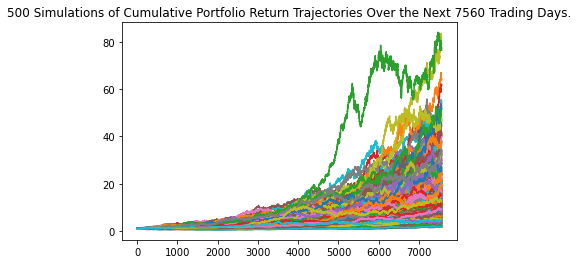

In [84]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
spy_line_plot = MC_weight_spy.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

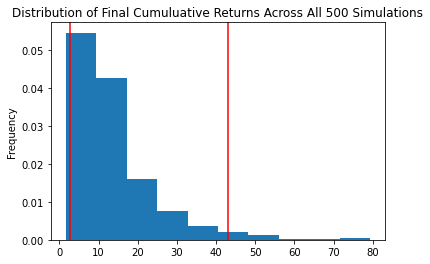

In [85]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
spy_dist_plot = MC_weight_spy.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [86]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
spy_table = MC_weight_spy.summarize_cumulative_return()

# Print summary statistics
print(spy_table)

count           500.000000
mean             13.825354
std              10.913649
min               1.617628
25%               6.978645
50%              10.601951
75%              16.915788
max              79.343085
95% CI Lower      2.797080
95% CI Upper     42.994641
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [88]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of your portfolio is ${total_stocks_bonds:,.2f}")


The current value of your portfolio is $60,688.70


In [91]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
spy_ci_lower = round(spy_table[8]*total_stocks_bonds,2)
spy_ci_upper = round(spy_table[9]*total_stocks_bonds,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds:,.2f} in the portfolio"
      f" with a 60% weight in SPY over the next 30 years will end within in the range of"
      f" ${spy_ci_lower} and ${spy_ci_upper}.")


There is a 95% chance that an initial investment of $60,688.70 in the portfolio with a 60% weight in SPY over the next 30 years will end within in the range of $169751.12 and $2609288.86.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?